# Importar dados

In [1]:
import pandas as pd
train_data = pd.read_csv(r'../data/train.csv')
test_data = pd.read_csv(r'../data/test.csv')

In [2]:
train_data.shape

(112, 4)

# Analisar Dados

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         112 non-null    int64
 1   age        112 non-null    int64
 2   sex        112 non-null    int64
 3   education  112 non-null    int64
dtypes: int64(4)
memory usage: 3.6 KB


In [4]:
train_data.describe()

,id,age,sex,education
count,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714
std,32.475632,22.642156,0.501927,4.909870
min,1.000000,13.000000,0.000000,0.000000
25%,28.750000,20.000000,0.000000,4.000000
50%,56.500000,51.500000,0.000000,9.000000
75%,84.250000,65.250000,1.000000,12.000000
max,112.000000,79.000000,1.000000,20.000000


In [5]:
#fig = plt.figure(figsize = (20,5))
#ax = fig.gca()
#train_data['education'].hist(ax = ax)
train_data.head()

,id,age,sex,education
0,1,13,1,7
1,2,14,0,8
2,3,15,1,9
3,4,15,1,9
4,5,15,1,9


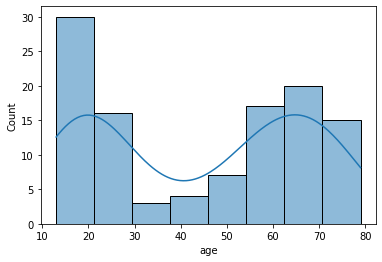

In [6]:
#train_data.isna().any()

import seaborn as sns
#sns.histplot(train_data['age'], kde='True')
#sns.histplot(train_data['sex'], kde='True')
sns.histplot(train_data['age'], kde='True')

#sns.boxplot(x=train_data['age'])
#sns.boxplot(x=train_data['sex'])
#sns.boxplot(x=train_data['education'])

import matplotlib.pyplot as plt
#corr_matrix = train_data.corr()
#f, ax = plt.subplots(figsize=(8,6))
#sns.heatmap(corr_matrix, vmin=1, vmax=1, square=True, annot=True)

# Tratar Dados

In [7]:
age_train = []
for ar in zip(train_data['age']):
    age = ar[0]
    if age < 31:
        age_train.append(0)
    elif age < 56:
        age_train.append(1)
    elif age < 63:
        age_train.append(2)
    elif age < 72:
        age_train.append(3)
    else:
        age_train.append(4)


train_data['age'] = age_train

In [8]:
train_data.head()

,id,age,sex,education
0,1,0,1,7
1,2,0,0,8
2,3,0,1,9
3,4,0,1,9
4,5,0,1,9


# Visualisar os dados

In [9]:
import numpy as np
import scipy.io

mat = scipy.io.loadmat('../data/train_data.mat')

X = mat["train_data"]
print(X)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.02631835 0.01242944 0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.01770987 0.         0.        ]]

 [[0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  [0.         0.      

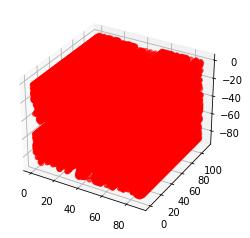

In [10]:
#todos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z,x,y = X.nonzero()
            
ax.scatter(x, y, -z, zdir='z', c= 'red')
plt.show()

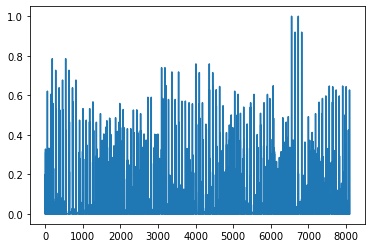

In [11]:
#Exemplo 1 pessoa
store = []
for i in range(90):
    for j in range (90):
        store.append(X[i][j][15])
        #print(X[i][j][0])
        
plt.plot(store)

# Importar matrizes de conectividade

In [12]:
def get_data_from_mat(train_file,test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 
    print(train_mat.keys())
    print(test_mat.keys())
    train_np = np.array(train_mat['train_data']).transpose(2,0,1)
    test_np = np.array(test_mat['test_data']).transpose(2,0,1)
    print(train_np.shape)
    print(test_np.shape)
    return  train_np, test_np


train_mat, test_mat = get_data_from_mat('../data/train_data.mat','../data/test_data.mat')

dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
(112, 90, 90)
(28, 90, 90)


# Treinar o modelo 1 - Utilizar os dados das matrizes e apenas as labels do csv


In [13]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3618818927961877326
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4160159744
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11852619656059565700
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [16]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Embedding, BatchNormalization, Dropout
from livelossplot.inputs.tf_keras import PlotLossesCallback
from tensorflow.keras.initializers import RandomNormal, Constant

y_train = train_data['age']
x_train = train_mat
x_train = tf.expand_dims(x_train, axis=-1)

model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(90,90,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 88, 88, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 42, 42, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 21, 21, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 19, 128)       147584    
_________________________________________________________________
flatten_2 (Flatten)          (None, 46208)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

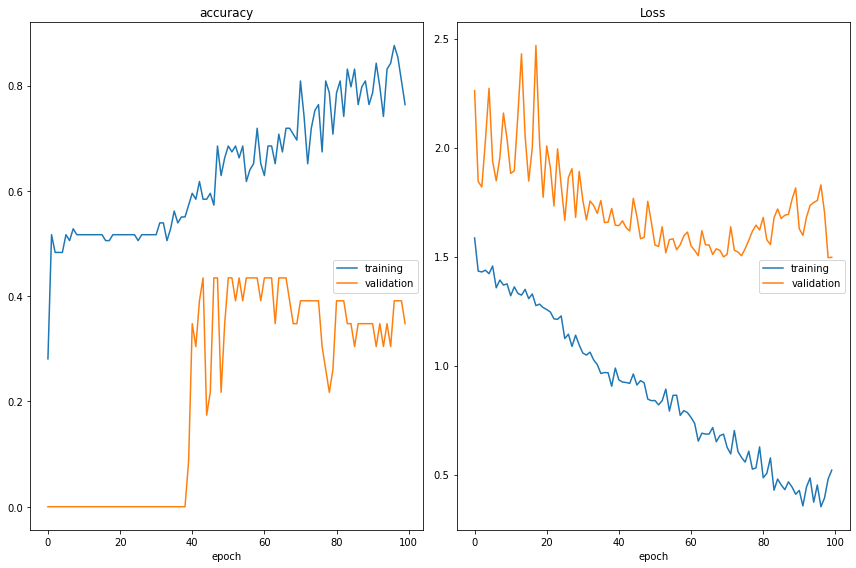

accuracy
	training         	 (min:    0.281, max:    0.876, cur:    0.764)
	validation       	 (min:    0.000, max:    0.435, cur:    0.348)
Loss
	training         	 (min:    0.352, max:    1.585, cur:    0.520)
	validation       	 (min:    1.495, max:    2.469, cur:    1.497)


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')





history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[PlotLossesCallback()])

# Aplicar o modelo às matrizes de treino

In [15]:
print("Evaluate")
train_mat = tf.expand_dims(train_mat, axis=-1)
result = model.predict(train_mat)
print(result)

Evaluate
[[15.029712]
 [12.308681]
 [15.902021]
 [13.10523 ]
 [17.874907]
 [16.663433]
 [28.426003]
 [15.937349]
 [16.854158]
 [21.20642 ]
 [17.96525 ]
 [14.974927]
 [14.203675]
 [20.06604 ]
 [10.713057]
 [16.628119]
 [11.261007]
 [17.605549]
 [24.595434]
 [13.941246]
 [21.17478 ]
 [15.526663]
 [17.095148]
 [16.368793]
 [20.948679]
 [20.551867]
 [31.437056]
 [17.605097]
 [38.138   ]
 [25.362238]
 [29.092852]
 [24.884857]
 [16.175945]
 [20.699335]
 [23.897657]
 [14.156448]
 [23.56775 ]
 [15.352959]
 [20.142193]
 [25.45534 ]
 [21.396494]
 [19.848576]
 [19.877607]
 [39.622738]
 [29.486687]
 [21.864592]
 [23.767735]
 [27.476313]
 [25.30345 ]
 [13.750458]
 [15.818333]
 [20.710283]
 [25.387796]
 [15.238722]
 [22.154196]
 [62.44465 ]
 [52.07926 ]
 [69.048904]
 [41.44031 ]
 [71.14808 ]
 [57.653805]
 [50.21422 ]
 [50.36529 ]
 [64.28867 ]
 [55.700005]
 [69.63605 ]
 [53.91252 ]
 [62.381382]
 [56.006485]
 [77.576584]
 [58.12479 ]
 [60.506683]
 [67.07496 ]
 [56.221134]
 [58.95006 ]
 [63.96398 ]
 [5

# Treinar o modelo 2 - com os dados todos do csv mais os resultados do primeiro treino

In [33]:
result = pd.DataFrame(result,columns=['RMage'])
train_data['RMage']=result



In [35]:
train_data.shape

(112, 5)

In [36]:
train_data.describe()

,id,age,sex,education,RMage
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714,40.034367
std,32.475632,22.642156,0.501927,4.909870,21.303530
min,1.000000,13.000000,0.000000,0.000000,10.713057
25%,28.750000,20.000000,0.000000,4.000000,20.018932
50%,56.500000,51.500000,0.000000,9.000000,40.531525
75%,84.250000,65.250000,1.000000,12.000000,58.331108
max,112.000000,79.000000,1.000000,20.000000,81.127975


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         112 non-null    int64  
 1   age        112 non-null    int64  
 2   sex        112 non-null    int64  
 3   education  112 non-null    int64  
 4   RMage      112 non-null    float32
dtypes: float32(1), int64(4)
memory usage: 4.1 KB


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, SimpleRNN, Dense, Dropout

model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(3,)))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(.2))
model2.add(Dense(1, activation='relu'))

model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_39 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_40 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 65        
Total params: 115,841
Trainable params: 115,841
Non-trainable params: 0
________________________________________________

In [47]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_percentage_error')


x_train = train_data.drop(['age','id'],axis=1)
y_train = train_data['age']

x_train.shape



(112, 3)

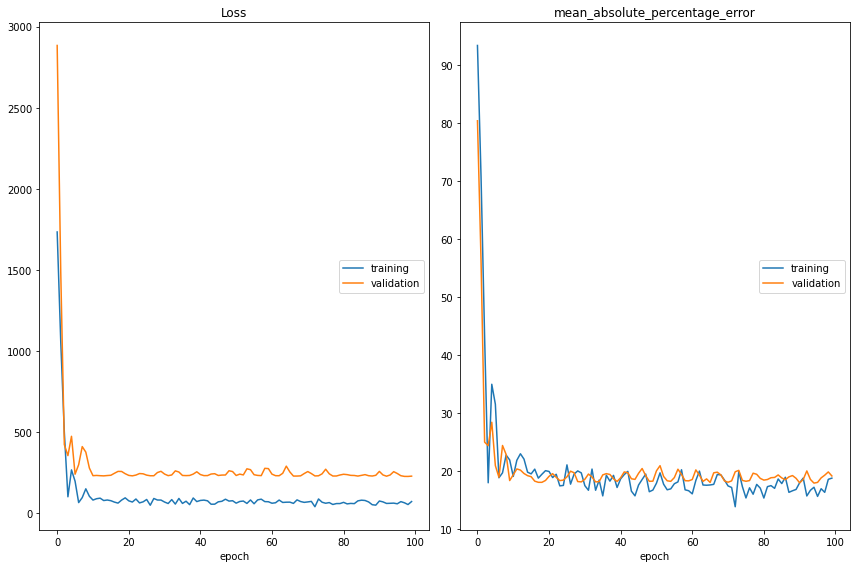

Loss
	training         	 (min:   40.245, max: 1734.205, cur:   72.243)
	validation       	 (min:  227.113, max: 2883.910, cur:  228.858)
mean_absolute_percentage_error
	training         	 (min:   13.830, max:   93.323, cur:   18.762)
	validation       	 (min:   17.902, max:   80.345, cur:   19.132)


In [48]:
history2 = model2.fit(x_train, y_train, epochs=100, batch_size=32,validation_split=0.2, callbacks=[PlotLossesCallback()])

# Testar o modelo 2

In [49]:
test_mat = tf.expand_dims(test_mat, axis=-1)
result = model.predict(test_mat)
print(result)

[[20.244793]
 [16.757723]
 [19.146864]
 [23.422043]
 [17.506733]
 [18.89118 ]
 [44.527134]
 [45.024563]
 [39.406456]
 [55.109283]
 [62.818462]
 [67.505424]
 [78.48081 ]
 [64.21005 ]
 [17.61614 ]
 [21.588116]
 [14.744976]
 [22.487402]
 [20.110743]
 [21.6869  ]
 [51.042694]
 [45.62814 ]
 [57.32265 ]
 [79.519135]
 [55.81847 ]
 [45.98159 ]
 [58.98175 ]
 [56.954586]]


In [51]:
result = pd.DataFrame(result,columns=['RMage'])
test_data['RMage']=result

In [57]:
resultados_finais = model2.predict(test_data.drop(['id'],axis=1))
print(resultados_finais)

[[21.246698]
 [17.957378]
 [20.338135]
 [24.418358]
 [19.185783]
 [24.427912]
 [48.21403 ]
 [48.257175]
 [42.711994]
 [58.7587  ]
 [67.74194 ]
 [72.29205 ]
 [82.9723  ]
 [68.379745]
 [18.645088]
 [22.705067]
 [15.666217]
 [25.834135]
 [22.851017]
 [22.813595]
 [54.507107]
 [48.88821 ]
 [61.072758]
 [83.87239 ]
 [59.286198]
 [49.21576 ]
 [62.70108 ]
 [60.68795 ]]


# Prepare submission

In [59]:
with open("submissao.csv", "w") as sub:
    # Writing data to a file
    sub.write('id,age\n')
    for i in test_data['id']:
        sub.write(str(i)+','+str(float(resultados_finais[i-1]))+'\n')
    